The problem is the international airline passengers prediction problem.

ref: https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/

##  导入数据

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336
 340 318 362 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472
 548 559 463 407 362 405 417 391 419 461 472 535 622 606 508 461 390 432]
<class 'numpy.ndarray'>


<function matplotlib.pyplot.show(close=None, block=None)>

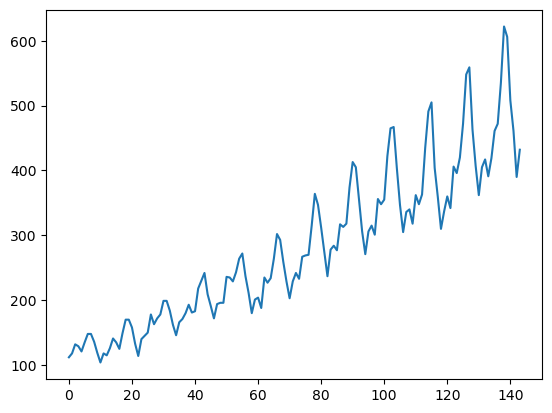

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('airline-passengers.csv')
time_series = df[["Passengers"]].values.astype('float32')

plt.plot(time_series)
plt.show

In [32]:
train_size = int(len(time_series) * 2 / 3)
test_size = len(time_series) - train_size

# split the datasets
train, test = time_series[:train_size], time_series[train_size:]

从时间t-w到t来预测t+1（或者更远的未来），这个w就是窗口大小，也就是回顾期。

In [24]:
import torch

def create_dataset(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset) - lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
        
    return torch.tensor(X), torch.tensor(y)

## 训练集构成
1. windows sample 样本数量：有多少个样本
1. time step 时间步长：与设置的lookback有关
1. features 特征值大小：\
     这里是一维的，但如果是类似于句子或者图片的话，那么可能位数比较大

In [57]:
# test function
lookback = 16
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([80, 16, 1]) torch.Size([80, 16, 1])
torch.Size([32, 16, 1]) torch.Size([32, 16, 1])


## 创建模型

In [58]:
import torch.nn as nn

# 建立一个模型
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 关于batch_first使用: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM
        # 这里是根据第一个维度来进行批量操作
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [66]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel()
# print(list(model.parameters()))
optimizer = optim.Adam(model.parameters())
loss_func = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        print(y_pred.shape)
        loss = loss_func(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0 :
        model.eval()
        with torch .no_grad():
            y_pred = model(X_train)
            train_rmse = np.sqrt(loss_func(y_pred, y_train))
            y_pred = model(X_test)
            test_rmse = np.sqrt(loss_func(y_pred, y_test))
        print("Epoch %d:train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
Epoch 0:train RMSE 221.2556, test RMSE 418.4765
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Siz

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
Epoch 1300:train RMSE 16.4270, test RMSE 112.6212
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.S

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size([8, 16, 1])
torch.Size(

## 显示结果

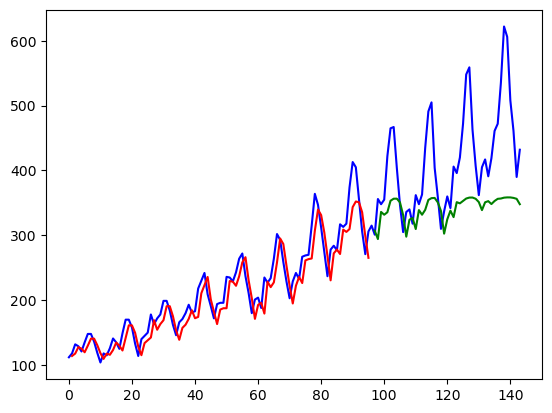

In [56]:
with torch.no_grad():
    train_plot = np.ones_like(time_series) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    
    test_plot = np.ones_like(time_series) * np.nan
    test_plot[train_size + lookback:len(time_series)] = model(X_test)[:, -1, :]
    
plt.plot(time_series, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()